In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('/Users/arijitchandra/Downloads/LTFS/train.csv', parse_dates=True)
test = pd.read_csv('/Users/arijitchandra/Downloads/LTFS/test.csv', parse_dates=True)
sub = pd.read_csv('/Users/arijitchandra/Downloads/LTFS/sample_sub.csv')

In [2]:
print(train.shape)
print(test.shape)
print(sub.shape)

(80402, 6)
(180, 3)
(180, 4)


In [3]:
%%time
from datetime import datetime
train['application_date']=[datetime.strptime(train.application_date[i],'%d/%m/%y') for i in range(len(train))]
test['application_date']=[datetime.strptime(test.application_date[i],'%d/%m/%y') for i in range(len(test))]

CPU times: user 2.77 s, sys: 8.85 ms, total: 2.78 s
Wall time: 2.78 s


In [4]:
train_s1 = train[train['segment']==1]
train_s2 = train[train['segment']==2]

In [5]:
train_s1.set_index('application_date', inplace=True)
#train_s2.set_index('application_date', inplace=True)
#
train_s1.index, train_s2.index

(DatetimeIndex(['2017-04-01', '2017-04-03', '2017-04-04', '2017-04-05',
                '2017-04-07', '2017-04-12', '2017-04-13', '2017-04-14',
                '2017-04-15', '2017-04-16',
                ...
                '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29',
                '2019-06-30', '2019-07-01', '2019-07-02', '2019-07-03',
                '2019-07-04', '2019-07-05'],
               dtype='datetime64[ns]', name='application_date', length=66898, freq=None),
 Int64Index([66898, 66899, 66900, 66901, 66902, 66903, 66904, 66905, 66906,
             66907,
             ...
             80392, 80393, 80394, 80395, 80396, 80397, 80398, 80399, 80400,
             80401],
            dtype='int64', length=13504))

In [6]:
train_s1 = train_s1.groupby(['application_date']).sum()

train_s2 = train_s2.groupby(['application_date']).sum()

In [7]:
cols_to_remove=['branch_id','segment']
train_s1.drop(cols_to_remove, axis=1, inplace=True)
train_s2.drop(cols_to_remove, axis=1, inplace=True)
train_s1.shape,train_s2.shape

((806, 1), (844, 1))

In [8]:
test_s1 = test[test['segment']==1]
test_s2 = test[test['segment']==2]
test_s1.shape,test_s2.shape

((87, 3), (93, 3))

In [9]:
test_s1.set_index('application_date', inplace=True)
#test_s2.set_index('application_date', inplace=True)

In [10]:
col=['segment','id']
test_s1.drop(col, axis =1, inplace = True)
test_s2.drop(col, axis =1, inplace = True)
test_s1.shape, test_s2.shape

/Users/arijitchandra/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((87, 0), (93, 1))

/Users/arijitchandra/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


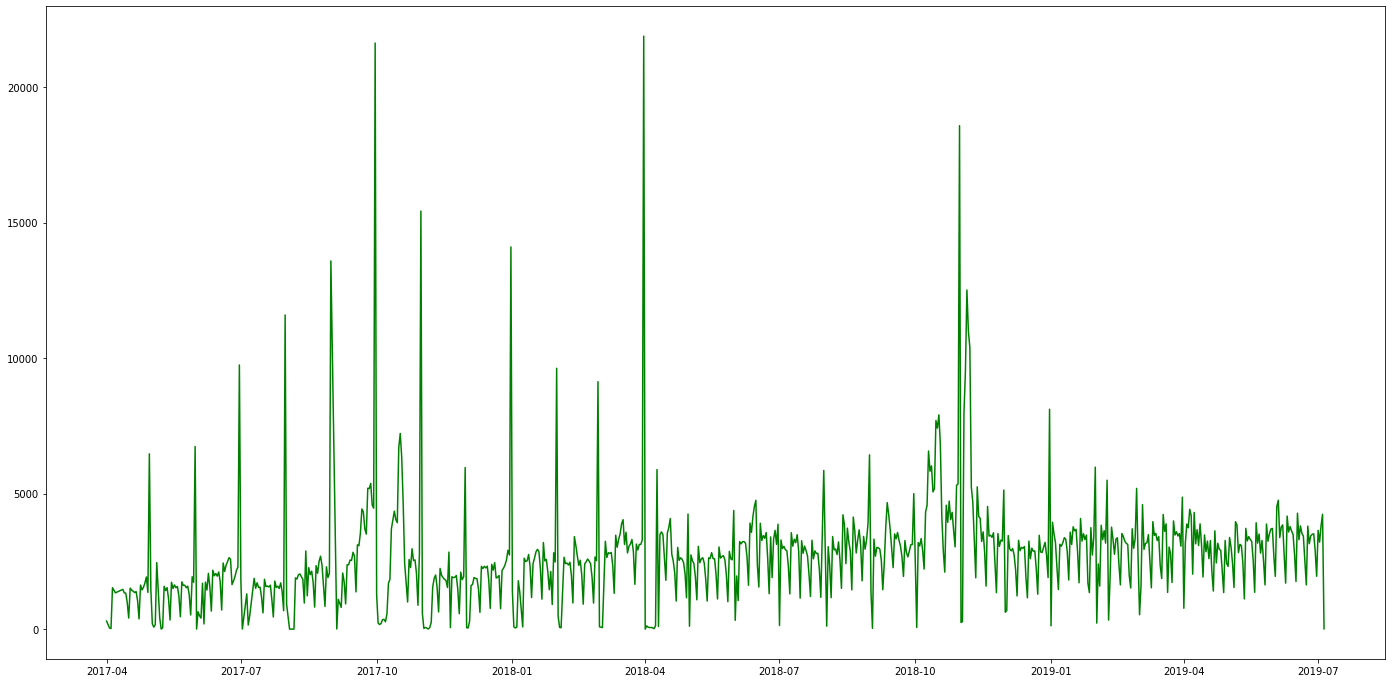

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plt.plot(train_s1, color = 'green')
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()

    #Plot rolling statistics:
    plt.figure(figsize=(24,12))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries["case_count"], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

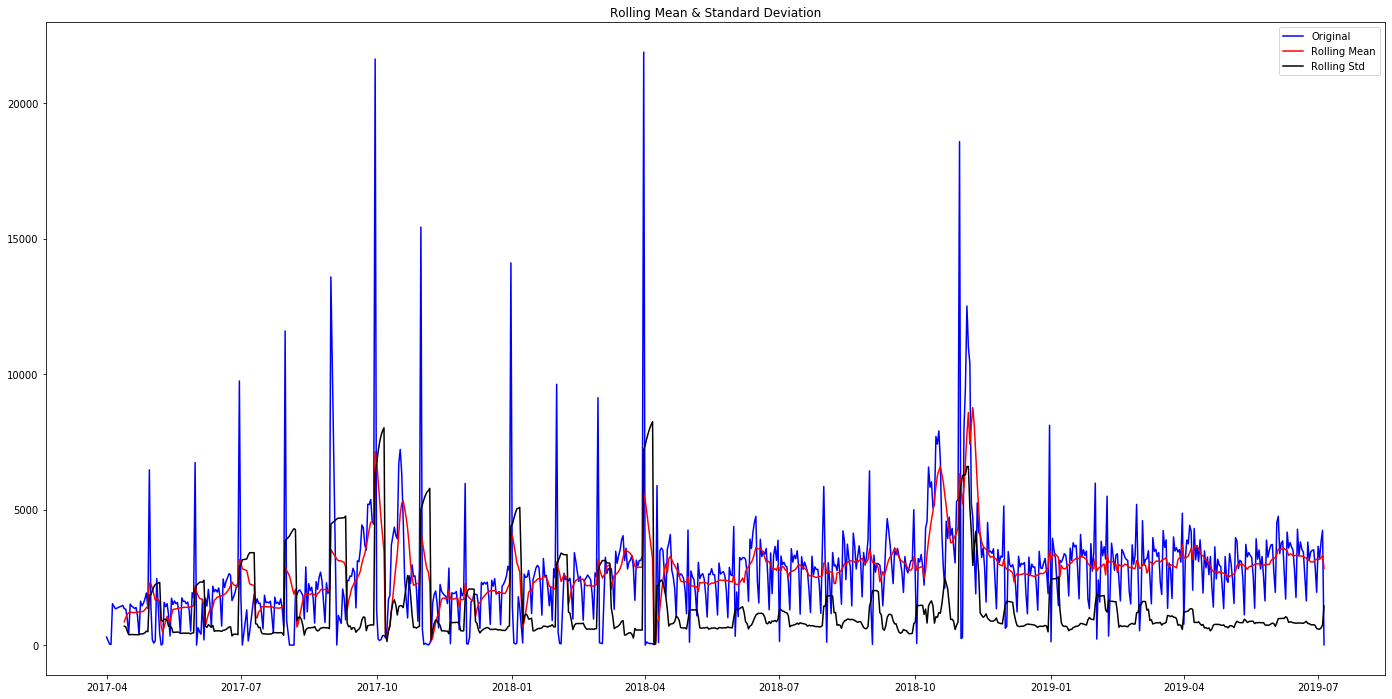

Results of Dickey-Fuller Test:
Test Statistic                  -4.550992
p-value                          0.000159
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64


In [13]:
test_stationarity(train_s1)

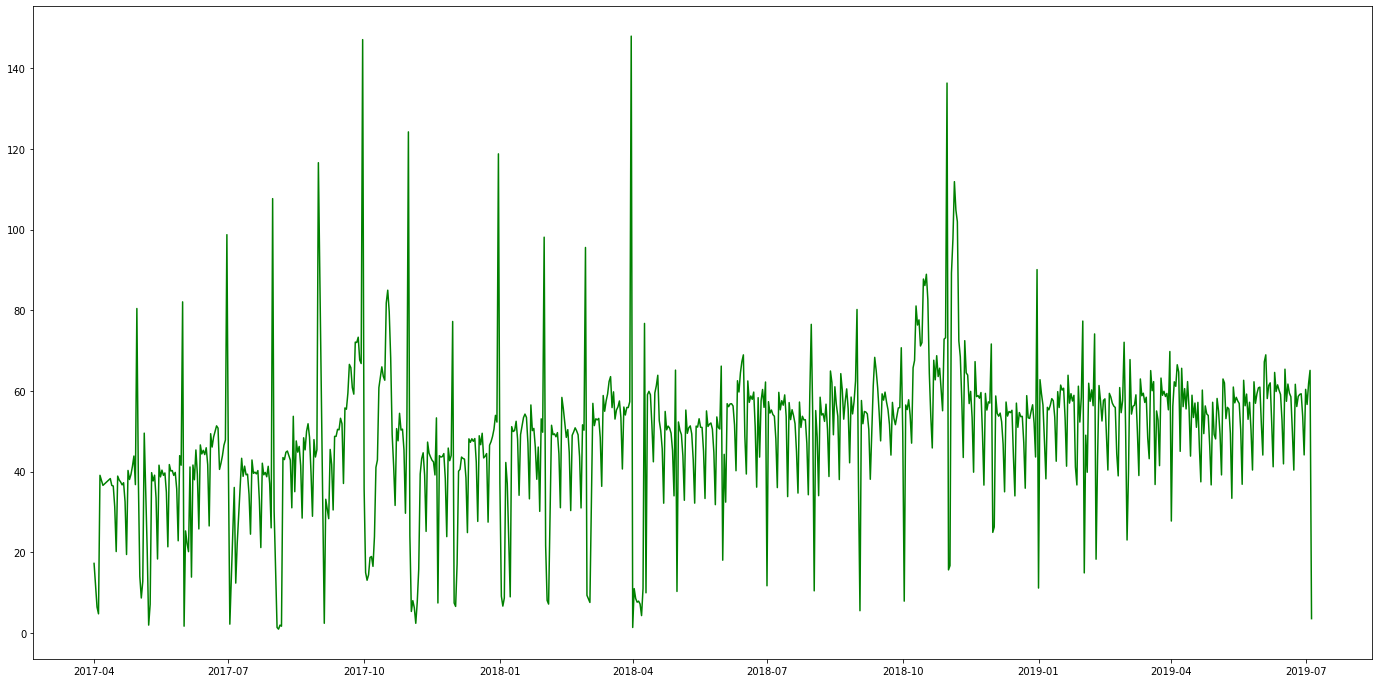

In [14]:
train_s1_sqrt = np.sqrt(train_s1)
plt.figure(figsize=(24,12))
plt.plot(train_s1_sqrt, color = 'green')

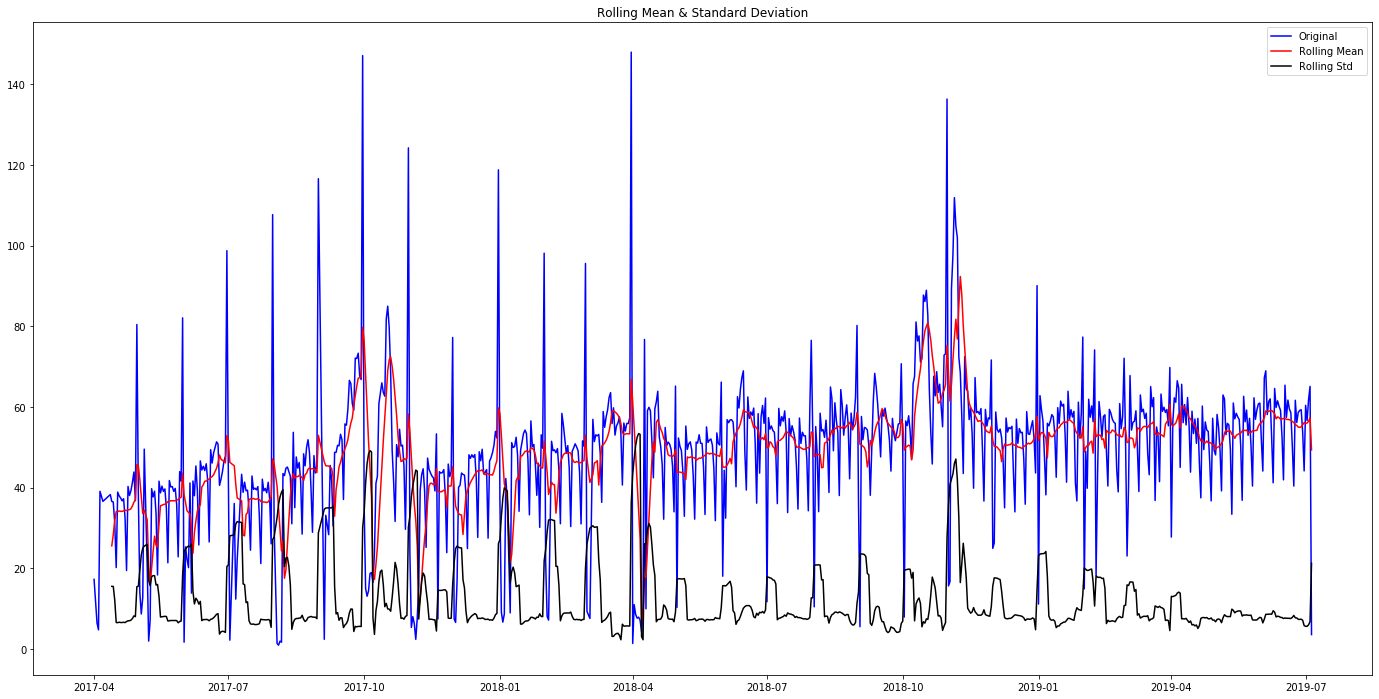

Results of Dickey-Fuller Test:
Test Statistic                  -3.408774
p-value                          0.010663
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64


In [15]:
test_stationarity(train_s1_sqrt)

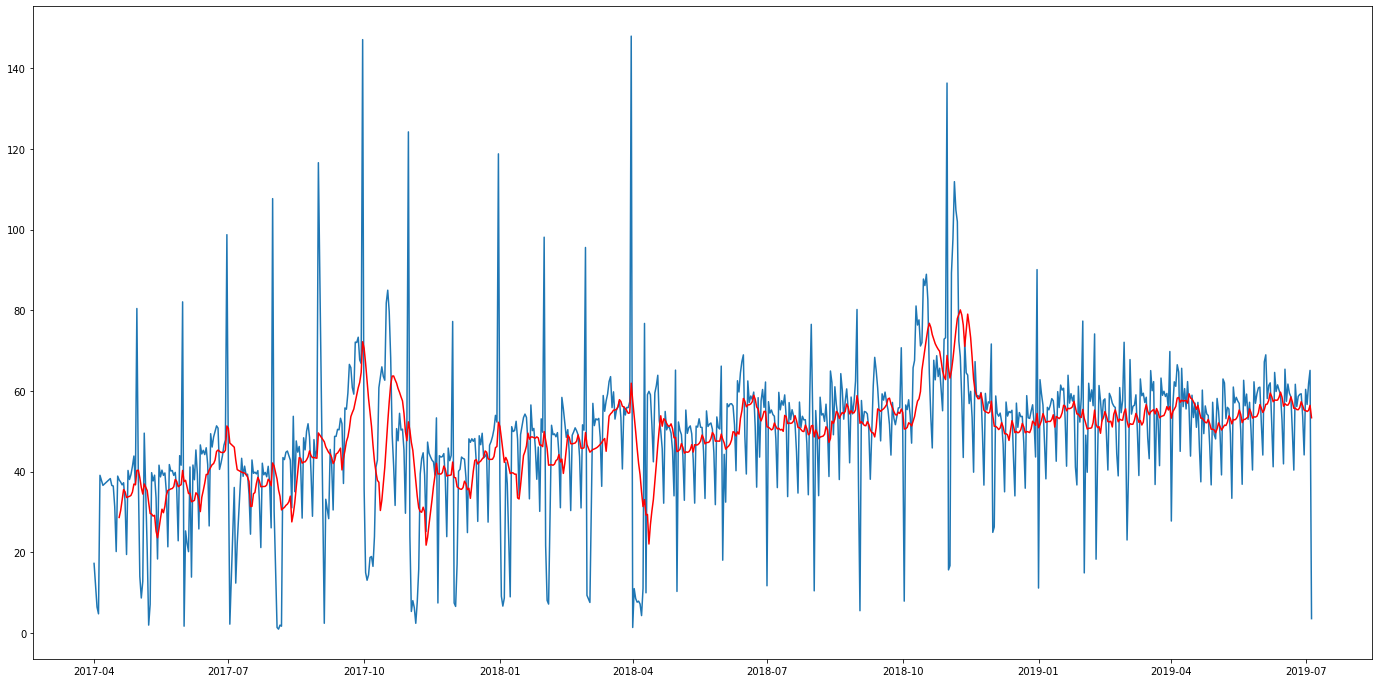

In [16]:
moving_avg_train_s1 = train_s1_sqrt.rolling(12).mean()
plt.figure(figsize=(24,12))
plt.plot(train_s1_sqrt)
plt.plot(moving_avg_train_s1, color='red')

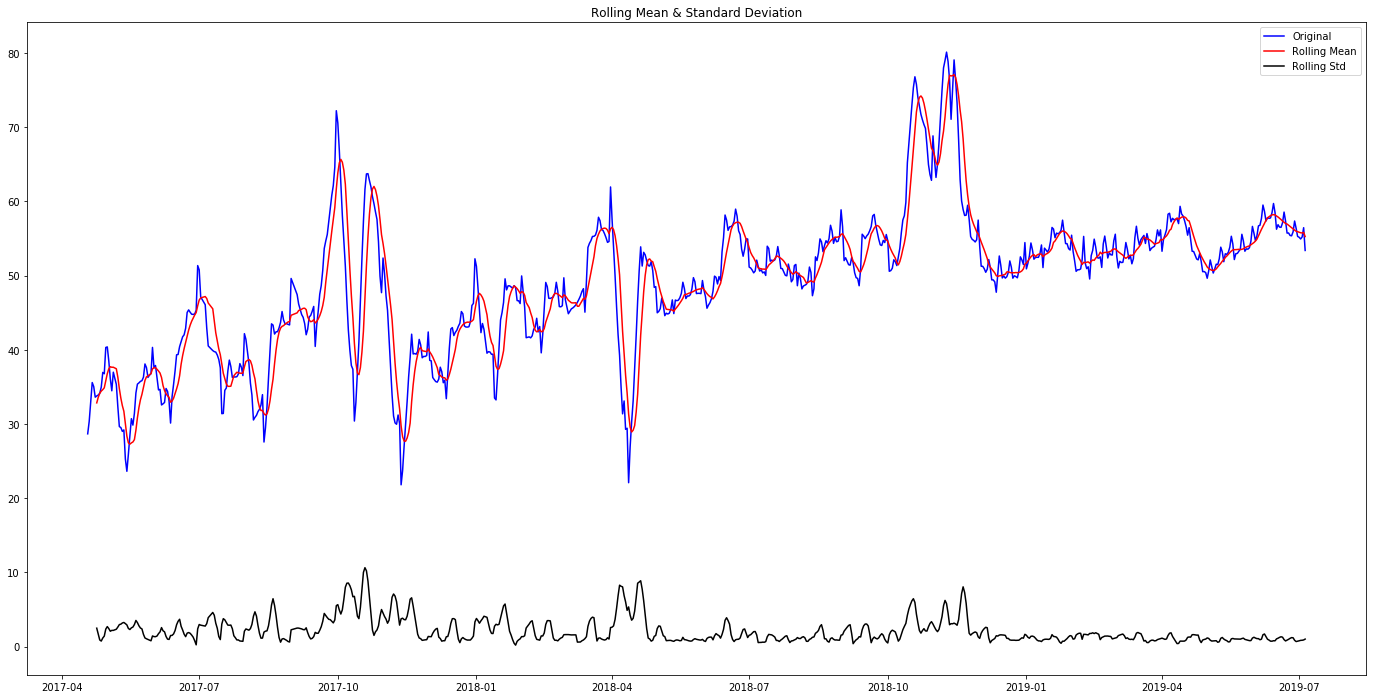

Results of Dickey-Fuller Test:
Test Statistic                  -2.960974
p-value                          0.038703
#Lags Used                      21.000000
Number of Observations Used    773.000000
Critical Value (1%)             -3.438838
Critical Value (5%)             -2.865286
Critical Value (10%)            -2.568765
dtype: float64


In [17]:
moving_avg_train_s1.dropna(inplace=True)
test_stationarity(moving_avg_train_s1)

In [18]:
train_s1_moving_avg_diff = train_s1_sqrt - moving_avg_train_s1
train_s1_moving_avg_diff.head(12)

,case_count
application_date,
2017-04-01,NaN
2017-04-03,NaN
2017-04-04,NaN
2017-04-05,NaN
2017-04-07,NaN
2017-04-12,NaN
2017-04-13,NaN
2017-04-14,NaN
2017-04-15,NaN


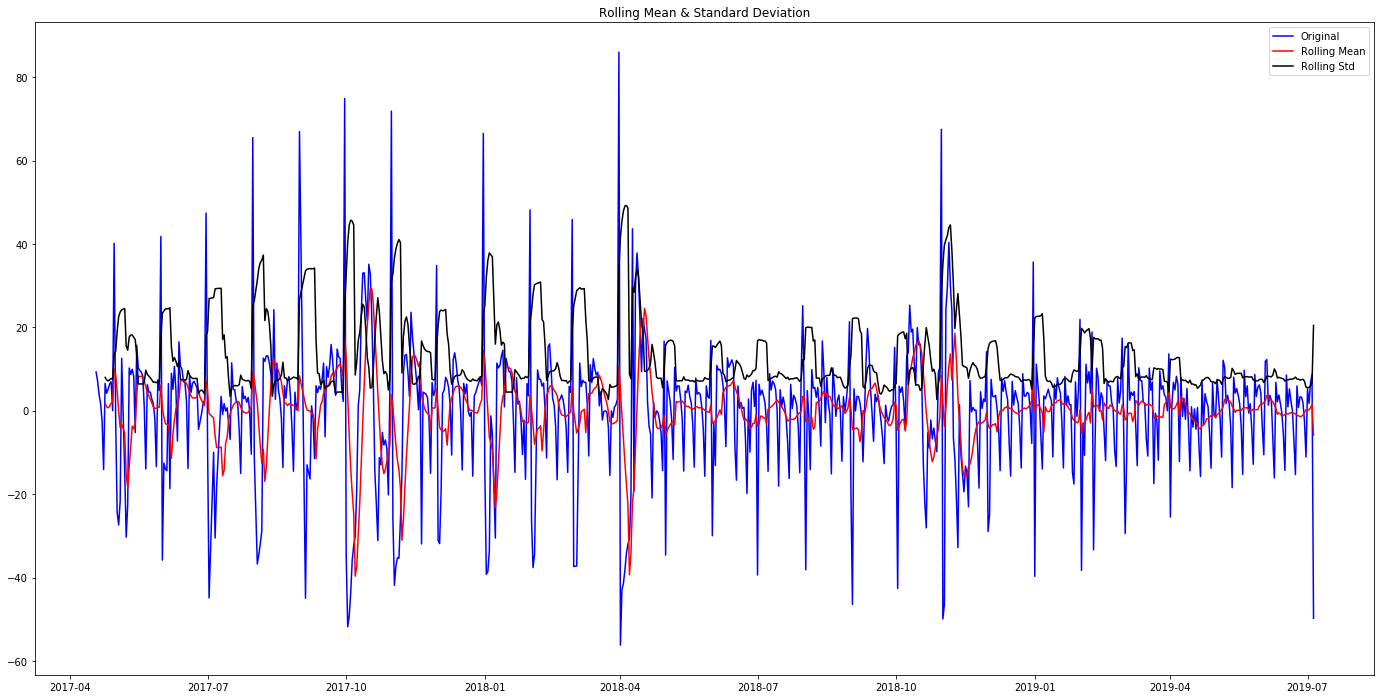

Results of Dickey-Fuller Test:
Test Statistic                -9.688323e+00
p-value                        1.154445e-16
#Lags Used                     2.100000e+01
Number of Observations Used    7.730000e+02
Critical Value (1%)           -3.438838e+00
Critical Value (5%)           -2.865286e+00
Critical Value (10%)          -2.568765e+00
dtype: float64


In [19]:
train_s1_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_s1_moving_avg_diff)

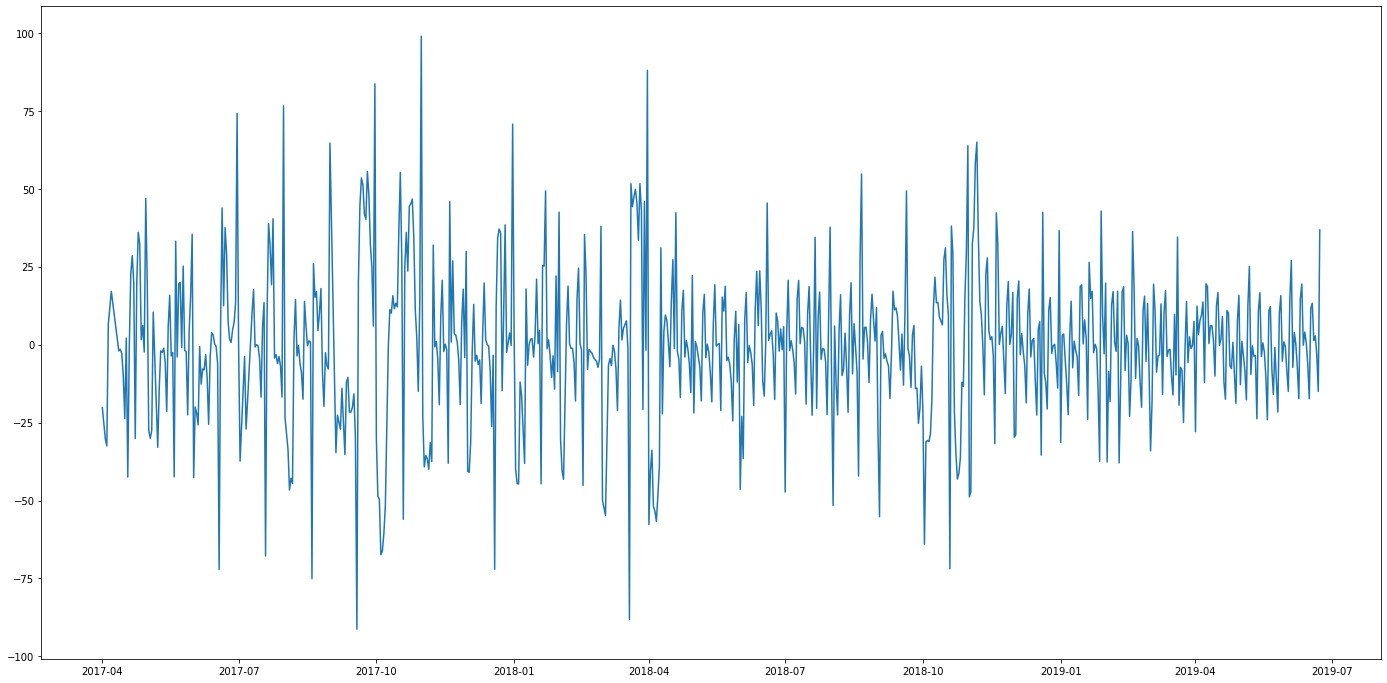

In [20]:
train_s1_diff = train_s1_sqrt - train_s1_sqrt.shift(-12)
plt.figure(figsize=(24,12))
plt.plot(train_s1_diff)

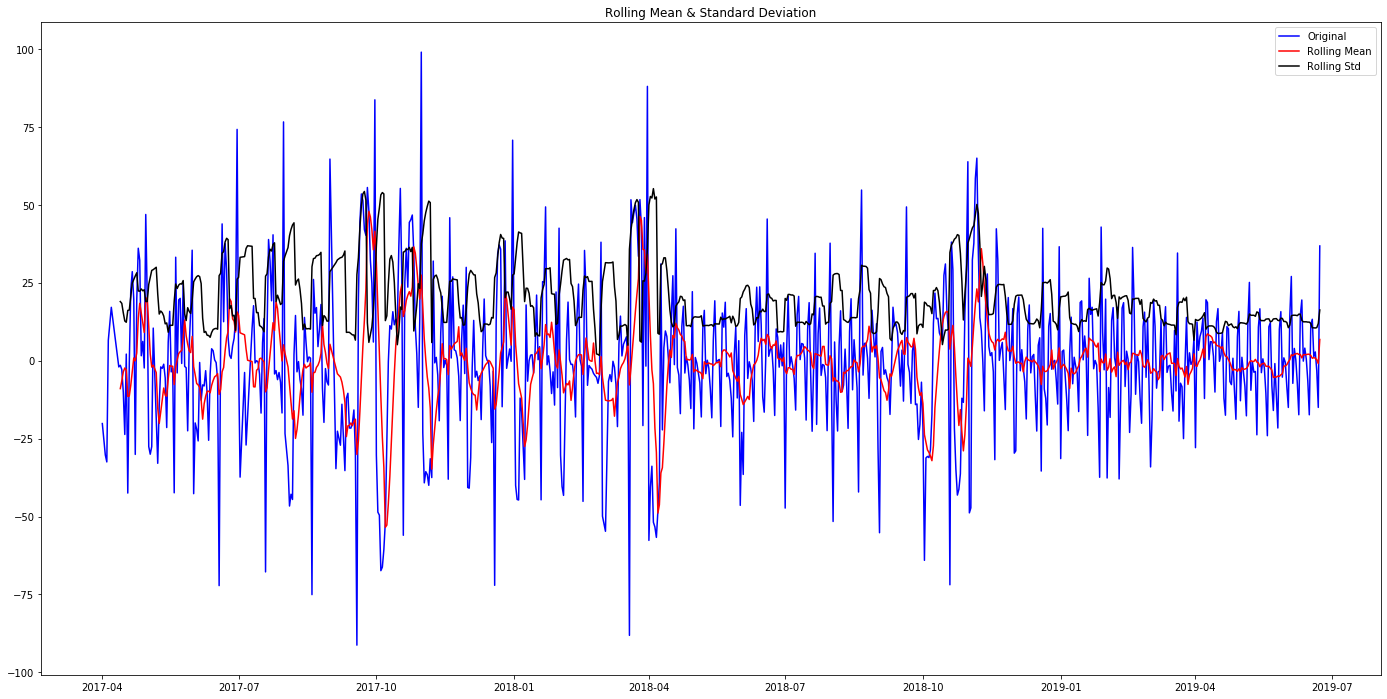

Results of Dickey-Fuller Test:
Test Statistic                -8.332541e+00
p-value                        3.338443e-13
#Lags Used                     2.100000e+01
Number of Observations Used    7.720000e+02
Critical Value (1%)           -3.438849e+00
Critical Value (5%)           -2.865291e+00
Critical Value (10%)          -2.568767e+00
dtype: float64


In [21]:
train_s1_diff.dropna(inplace=True)
test_stationarity(train_s1_diff)

In [25]:
train_s1_ma = moving_avg_train_s1.rolling(7).mean()
train_s1_ma.dropna(inplace=True)

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_s1 = seasonal_decompose(train_s1_ma, freq=30)
trend_s1 = decomposition_s1.trend
seasonal_s1 = decomposition_s1.seasonal
residual_s1 = decomposition_s1.resid

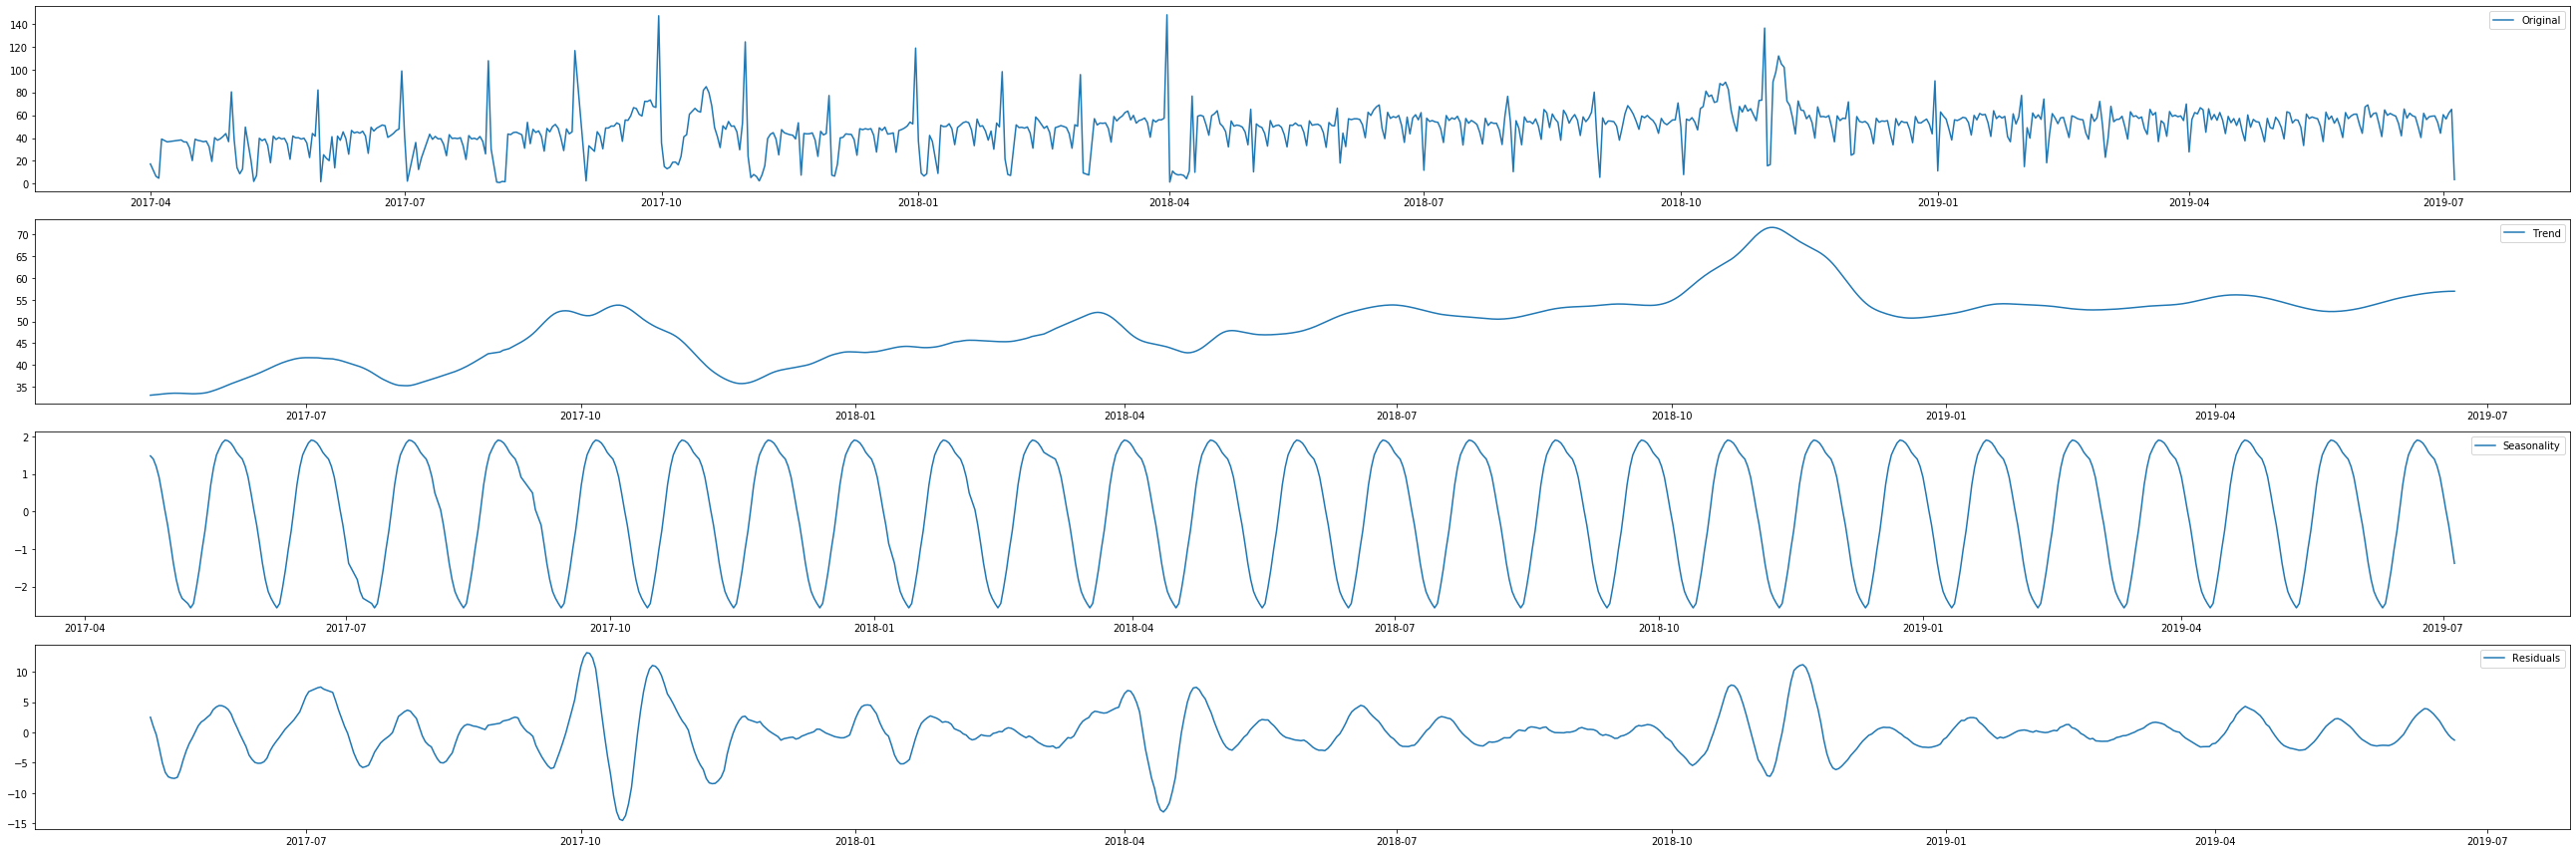

In [27]:
plt.figure(figsize=(36,12))
plt.subplot(411)
plt.plot(train_s1_sqrt, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_s1, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_s1,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_s1, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

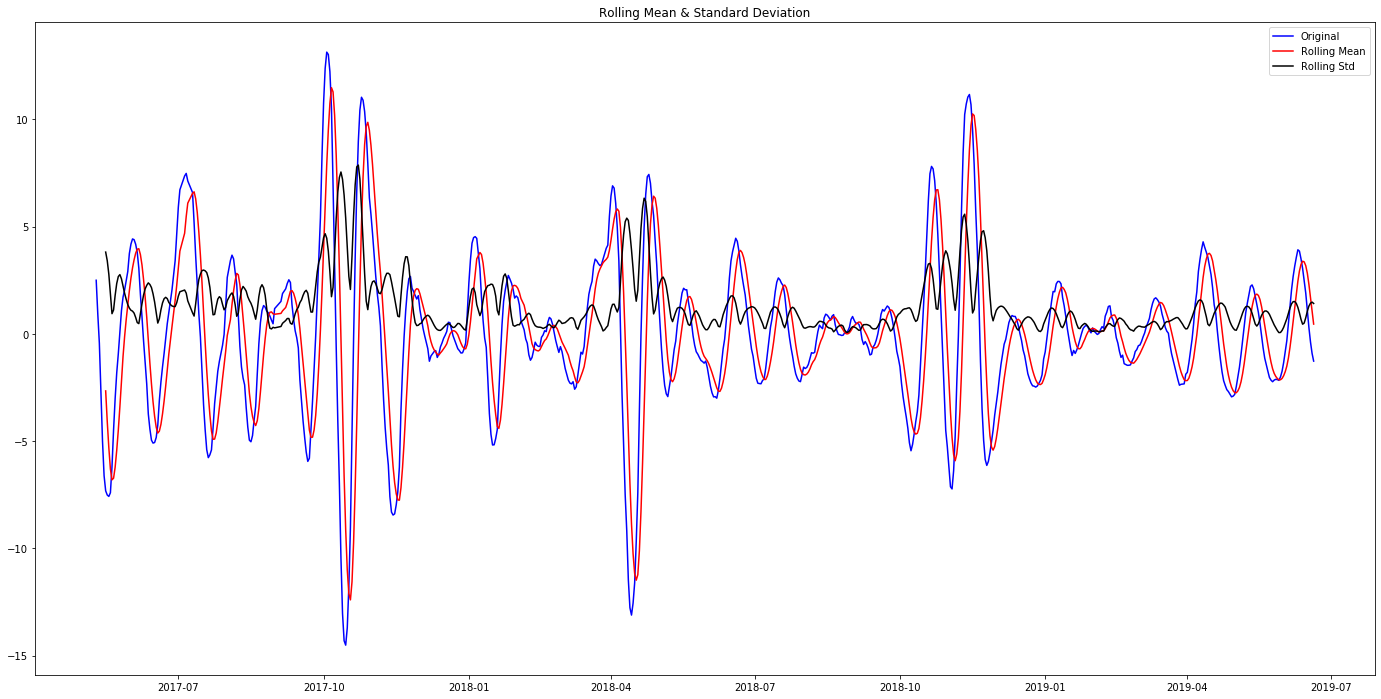

Results of Dickey-Fuller Test:
Test Statistic                -7.048588e+00
p-value                        5.602598e-10
#Lags Used                     2.000000e+01
Number of Observations Used    7.380000e+02
Critical Value (1%)           -3.439242e+00
Critical Value (5%)           -2.865464e+00
Critical Value (10%)          -2.568860e+00
dtype: float64


In [28]:
train_s1_decompose = residual_s1
train_s1_decompose.dropna(inplace=True)
test_stationarity(train_s1_decompose)

In [29]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf_s1 = acf(train_s1_ma, nlags=20)
lag_pacf_s1 = pacf(train_s1_ma, nlags=20, method='ols')

/Users/arijitchandra/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

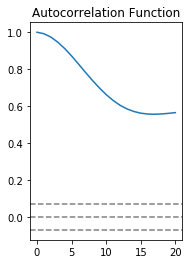

In [30]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_s1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_s1_sqrt)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_s1_sqrt)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

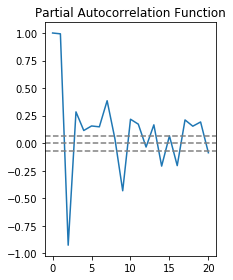

In [31]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_s1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_s1_sqrt)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_s1_sqrt)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

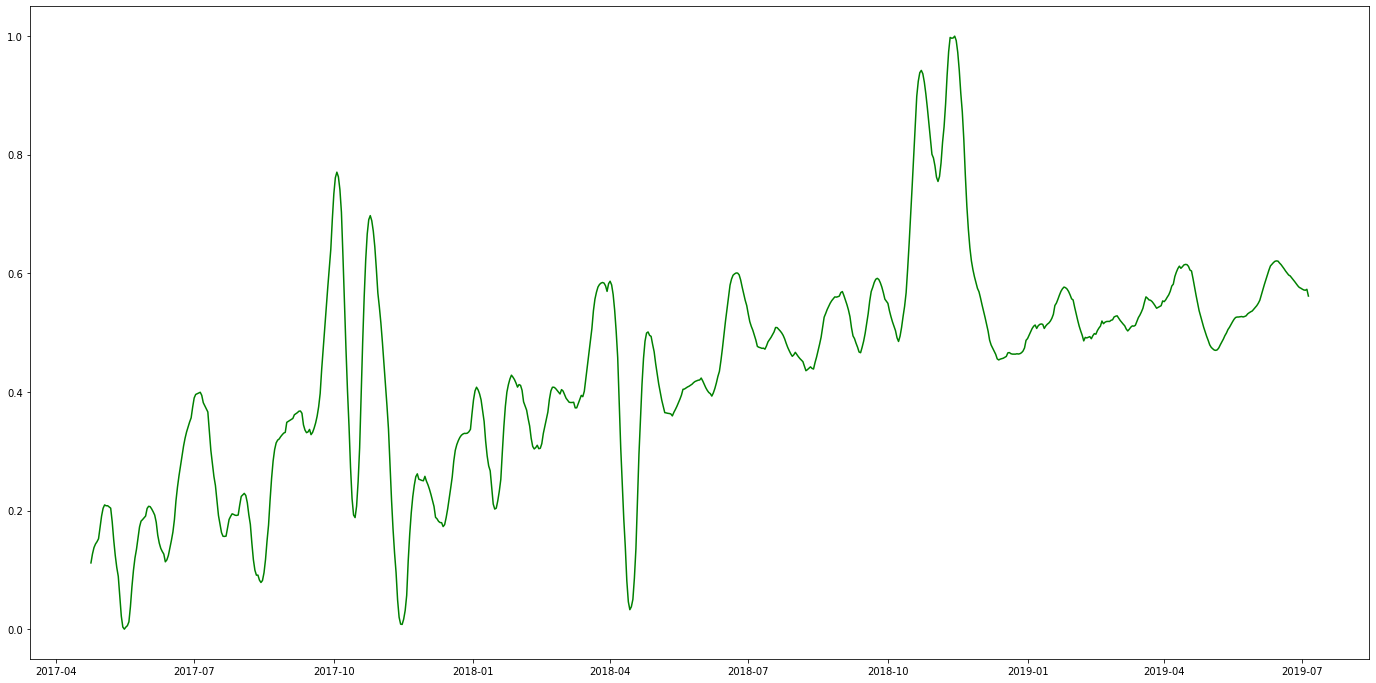

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train_s1_ma)
train_s1_scaled = scaler.transform(train_s1_ma)
train_s1_scaled = pd.DataFrame(train_s1_scaled, columns=[train_s1_ma.columns],
                               index=train_s1_ma.index)

plt.figure(figsize=(24,12))
plt.plot(train_s1_scaled, color = 'green')

In [34]:
import warnings
import itertools
warnings.filterwarnings("ignore")
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [35]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s1 = sm.tsa.statespace.SARIMAX(train_s1_ma,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results_s1 = mod_s1.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s1.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8400.677899894923
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8288.48207116999
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5429.49258545665
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5120.9054895988775
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5436.318493969713
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5438.405217714833
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5129.181939667963
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5125.4017125873615
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7309.172864969452
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7429.032019198161
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4369.247001616819
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5390.286030878693
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4380.6938405532455
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4136.657901870694
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4087.793629046899
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5136.617923786675
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2199.375270522567
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1802.7785298123058
ARIMA(0,

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9231      0.012     76.818      0.000       0.900       0.947
ma.L1          0.2901      0.028     10.473      0.000       0.236       0.344
ar.S.L12      -0.0685      0.043     -1.613      0.107      -0.152       0.015
ma.S.L12      -0.9577      0.022    -43.473      0.000      -1.001      -0.915
sigma2      2.628e-05   7.98e-07     32.946      0.000    2.47e-05    2.78e-05


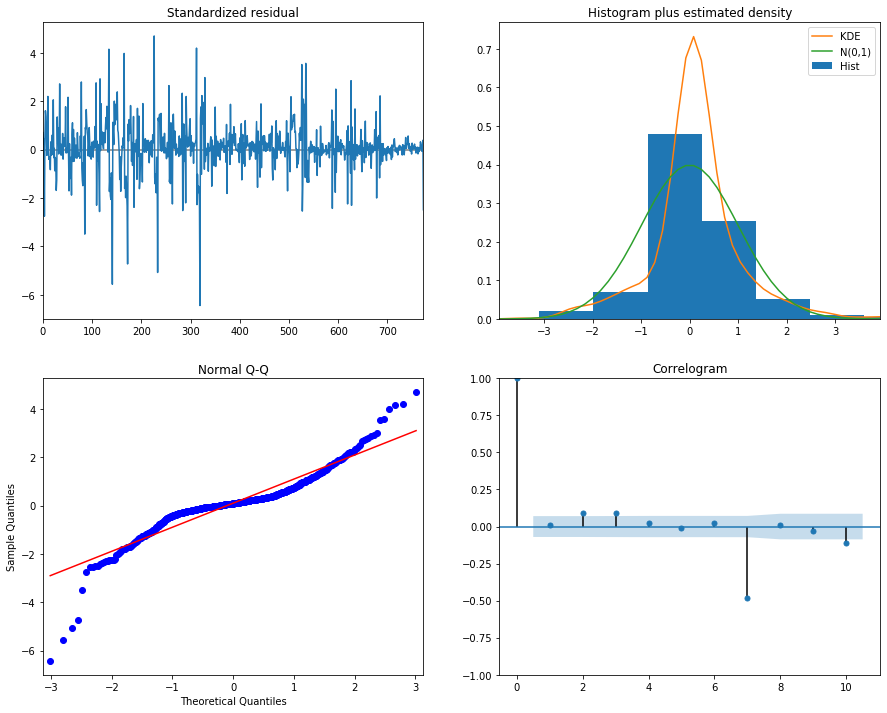

In [36]:
import statsmodels.api as sm
mod_s1 =sm.tsa.statespace.SARIMAX(train_s1_scaled,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_s1 = mod_s1.fit()

print(results_s1.summary().tables[1])

results_s1.plot_diagnostics(figsize=(15, 12))
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9277      0.015     62.210      0.000       0.898       0.957
ma.L1          0.3449      0.033     10.388      0.000       0.280       0.410
ar.S.L12      -0.0815      0.052     -1.560      0.119      -0.184       0.021
ma.S.L12      -0.9718      0.044    -21.973      0.000      -1.059      -0.885
sigma2         0.0766      0.004     20.569      0.000       0.069       0.084


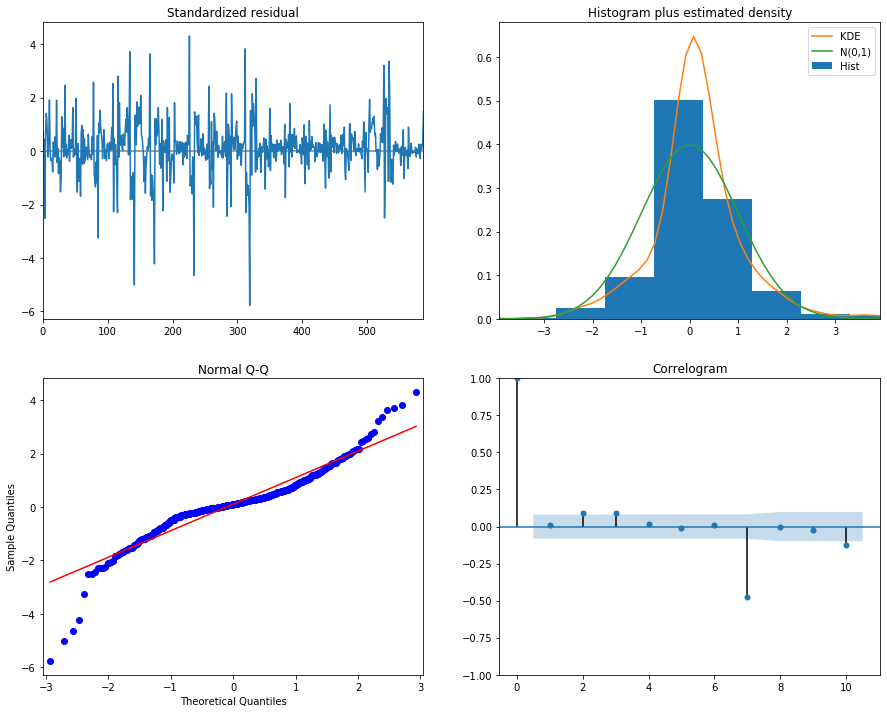

In [37]:
import statsmodels.api as sm
mod_val_s1 =sm.tsa.statespace.SARIMAX(train_s1_ma['2017':'2018'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_val_s1 = mod_val_s1.fit()

print(results_val_s1.summary().tables[1])

results_val_s1.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
## Checking MAPE on data for segment 1
##from sklearn.metrics import mean_absolute_error

pred_s1= results_val_s1.get_prediction(index=train_s1_scaled['2019'].index, start=1, end=len(train_s1_scaled['2019']))
pred_s1_values = pd.DataFrame(pred_s1.predicted_mean, index=train_s1_scaled['2019'].index)
pred_s1_values=scaler.inverse_transform(pred_s1_values)
pred_19 = pd.DataFrame(pred_s1_values, index=train_s1_scaled['2019'].index,
                       columns=train_s1_scaled['2019'].columns).apply(np.square)


pred_s1_trn = results_val_s1.get_prediction(index=train_s1_scaled['2017':'2018'].index,start=1,
                                         end=len(train_s1_scaled['2017':'2018']))
pred_s1_trn_values = pd.DataFrame(pred_s1_trn.predicted_mean, index=train_s1_scaled['2017':'2018'].index)
pred_s1_trn_values = scaler.inverse_transform(pred_s1_trn_values)
pred_17_18 = pd.DataFrame(pred_s1_trn_values, index=train_s1_scaled['2017':'2018'].index,
                          columns=train_s1_scaled['2017':'2018'].columns).apply(np.square)

mape_s1_trn = mean_absolute_percentage_error(scaler.inverse_transform(train_s1_scaled['2017':'2018'].values)**2,
                                             pred_17_18)
mape_s1 = mean_absolute_percentage_error(train_s1['2019'].values, pred_19)

print("MAPE on 2017 and 2018 segment 1 data :", mape_s1_trn)
print("MAPE on 2019 segment 1 data :", mape_s1)
pred_19

MAPE on 2017 and 2018 segment 1 data : 254632.99758121115
MAPE on 2019 segment 1 data : 412934.48102569


,case_count
application_date,
2019-01-01,5.863716e+06
2019-01-02,3.008627e+06
2019-01-03,3.069223e+06
2019-01-04,3.082528e+06
2019-01-05,3.099572e+06
...,...
2019-07-01,6.747082e+06
2019-07-02,6.369754e+06
2019-07-03,5.851386e+06


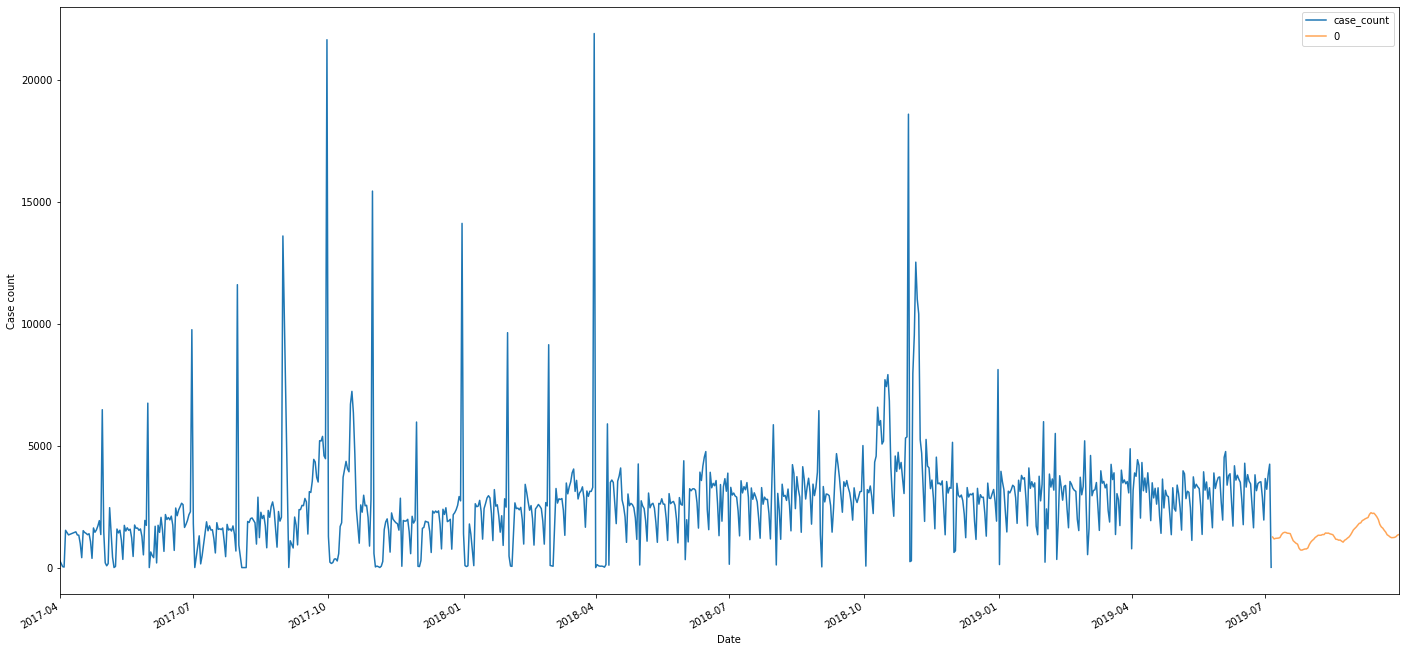

,0
application_date,
2019-07-06,1254.306494
2019-07-07,1175.488709
2019-07-08,1199.612362
2019-07-09,1204.972387
2019-07-10,1211.774499
...,...
2019-09-26,1231.420299
2019-09-27,1238.521937
2019-09-28,1267.714214


In [43]:
pred= results_s1.get_prediction(index=test_s1.index, start=1, end=len(test_s1))

pred_values=pd.DataFrame(pred.predicted_mean, index = test_s1.index)
pred_values=scaler.inverse_transform(pred_values)
pred_values=pd.DataFrame(pred_values, index = test_s1.index).apply(np.square)
                         
pred_ci = pred.conf_int()

ax = train_s1.plot(label='observed')
pred_values.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(24, 12))

ax.set_xlabel('Date')
ax.set_ylabel('Case count')
#plt.legend()
plt.show()
pred_values

In [44]:
train_s1.reset_index(inplace=True)
train_s1.set_index('application_date', inplace=True)
train_s1.index

DatetimeIndex(['2017-04-01', '2017-04-03', '2017-04-04', '2017-04-05',
               '2017-04-07', '2017-04-12', '2017-04-13', '2017-04-14',
               '2017-04-15', '2017-04-16',
               ...
               '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29',
               '2019-06-30', '2019-07-01', '2019-07-02', '2019-07-03',
               '2019-07-04', '2019-07-05'],
              dtype='datetime64[ns]', name='application_date', length=806, freq=None)

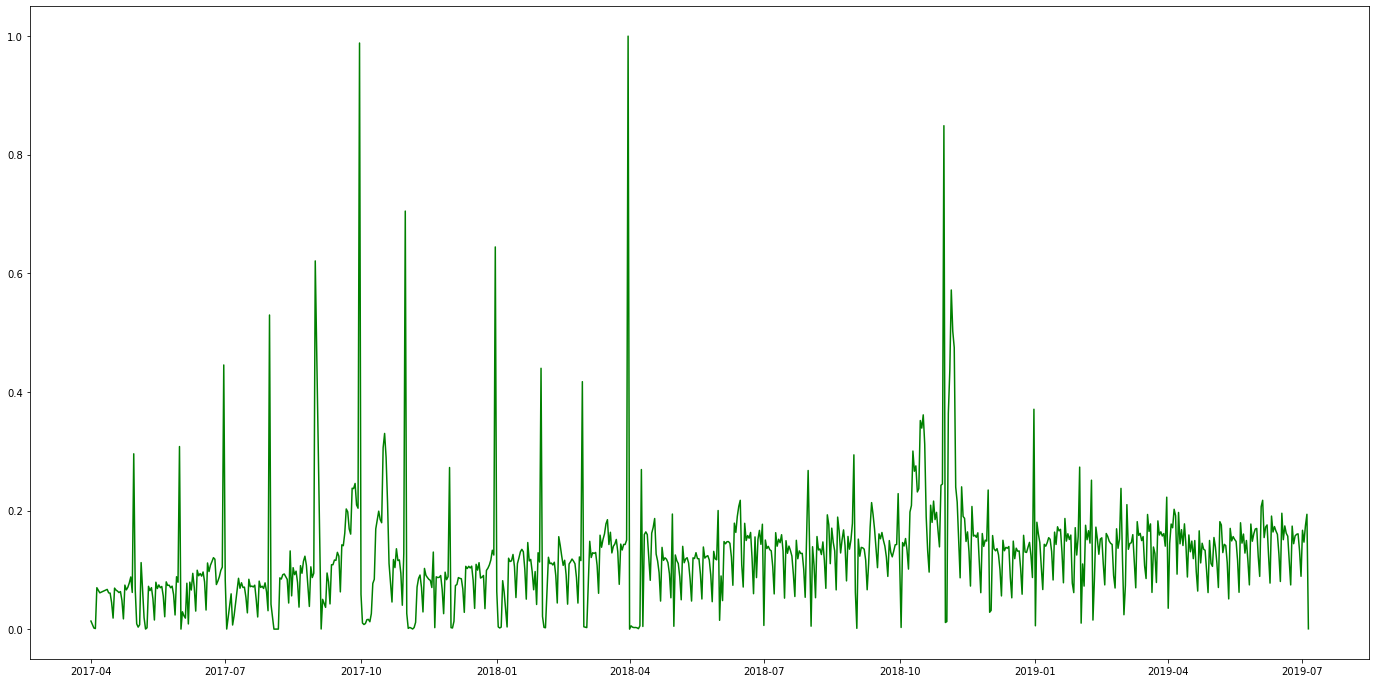

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train_s1)
train_s1_scaled = scaler.transform(train_s1)
train_s1_scaled = pd.DataFrame(train_s1_scaled, columns=[train_s1.columns],index=train_s1.index)

plt.figure(figsize=(24,12))
plt.plot(train_s1_scaled, color = 'green')

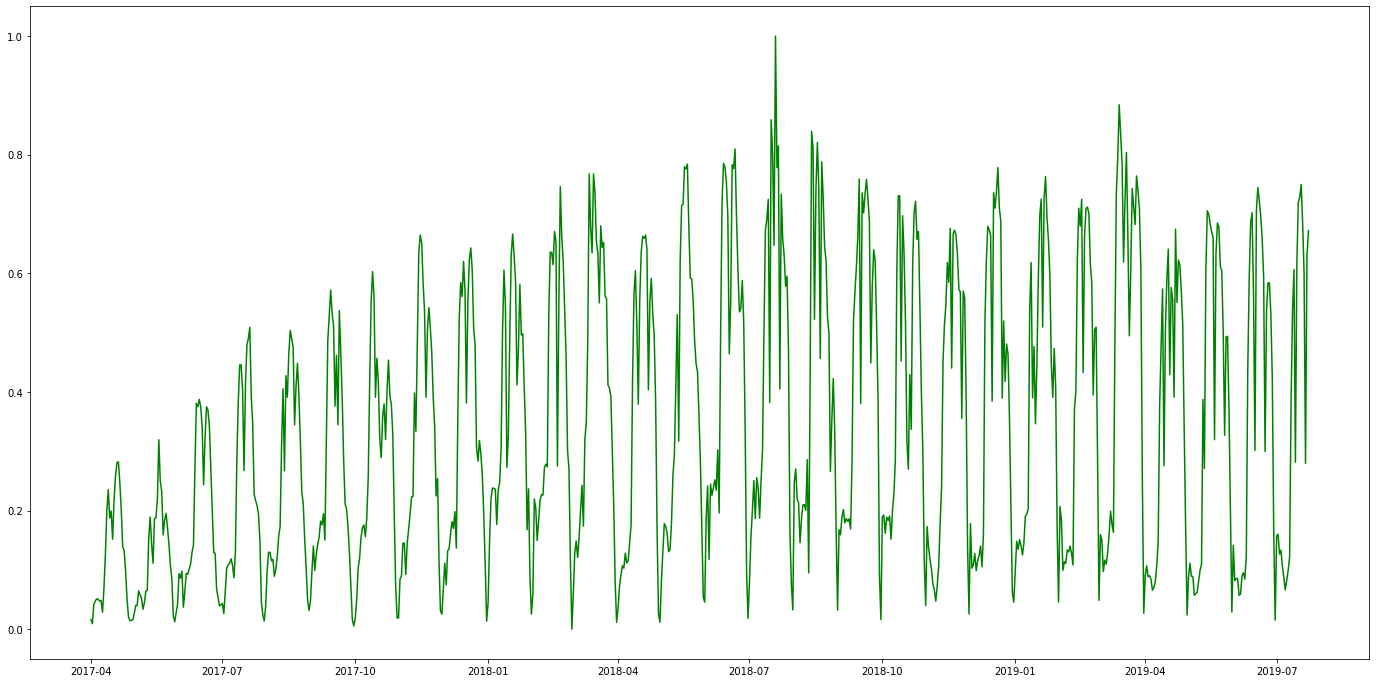

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler(feature_range = (0, 1))
scaler2.fit(train_s2)
train_s2_scaled = scaler2.transform(train_s2)
train_s2_scaled = pd.DataFrame(train_s2_scaled, columns=[train_s2.columns], index=train_s2.index)

plt.figure(figsize=(24,12))
plt.plot(train_s2_scaled, color = 'green')

In [50]:
# Creating a data structure with 60 timesteps and 1 output
X_train_s1 = []
y_train_s1 = []
for i in range(7, len(train_s1_scaled)):
    X_train_s1.append(train_s1_scaled.values[i-7:i, 0])
    y_train_s1.append(train_s1_scaled.values[i,0])
X_train_s1, y_train_s1 = np.array(X_train_s1), np.array(y_train_s1)

In [51]:
# Reshaping
X_train_s1 = np.reshape(X_train_s1, (X_train_s1.shape[0], X_train_s1.shape[1], 1))

In [52]:
X_train_s1.shape

(799, 7, 1)

In [53]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [54]:
# Initialising the RNN
regressor = Sequential()

In [55]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_s1.shape[1], 1)))
regressor.add(Dropout(0.2))

In [56]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

In [57]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

In [58]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [59]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [126]:
# Compiling the RNN
regressor.compile(optimizer = 'adamax', loss = 'mean_squared_error',
                  metrics=['mean_squared_error'])

In [127]:
X_train_s1.shape,y_train_s1.shape

((799, 7, 1), (799,))

In [128]:
# Fitting the RNN to the Training set
regressor.fit(X_train_s1, y_train_s1, epochs = 100, batch_size = 32)

Epoch 1/100
799/799 [==============================] - 3s 3ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 2/100
799/799 [==============================] - 1s 808us/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 3/100
799/799 [==============================] - 1s 834us/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 4/100
799/799 [==============================] - 1s 835us/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 5/100
799/799 [==============================] - 1s 768us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 6/100
799/799 [==============================] - 1s 798us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 7/100
799/799 [==============================] - 1s 822us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 8/100
799/799 [==============================] - 1s 806us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 9/100
799/799 [==============================] - 1s 809us/step - loss: 0.0061 - mean_squared

Epoch 73/100
799/799 [==============================] - 1s 827us/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 74/100
799/799 [==============================] - 1s 825us/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 75/100
799/799 [==============================] - 1s 823us/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 76/100
799/799 [==============================] - 1s 783us/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 77/100
799/799 [==============================] - 1s 816us/step - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 78/100
799/799 [==============================] - 1s 821us/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 79/100
799/799 [==============================] - 1s 813us/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 80/100
799/799 [==============================] - 1s 816us/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 81/100
799/799 [==============================] - 1s 814us/step - loss: 0.0056 - m

In [129]:
# Making the predictions and visualising the results

# Getting the case count for 2019
dataset_test = train_s1_scaled['2019'].values

dataset_total = train_s1_scaled['2017':'2018'].values
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 7:]
inputs = inputs.reshape(-1,1)
#inputs = scaler.transform(inputs)
X_test = []
for i in range(7, len(dataset_test)+7):
    X_test.append(inputs[i-7:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_case_count = regressor.predict(X_test)
predicted_case_count = scaler.inverse_transform(predicted_case_count)

In [130]:
predicted_case_count.shape

(186, 1)

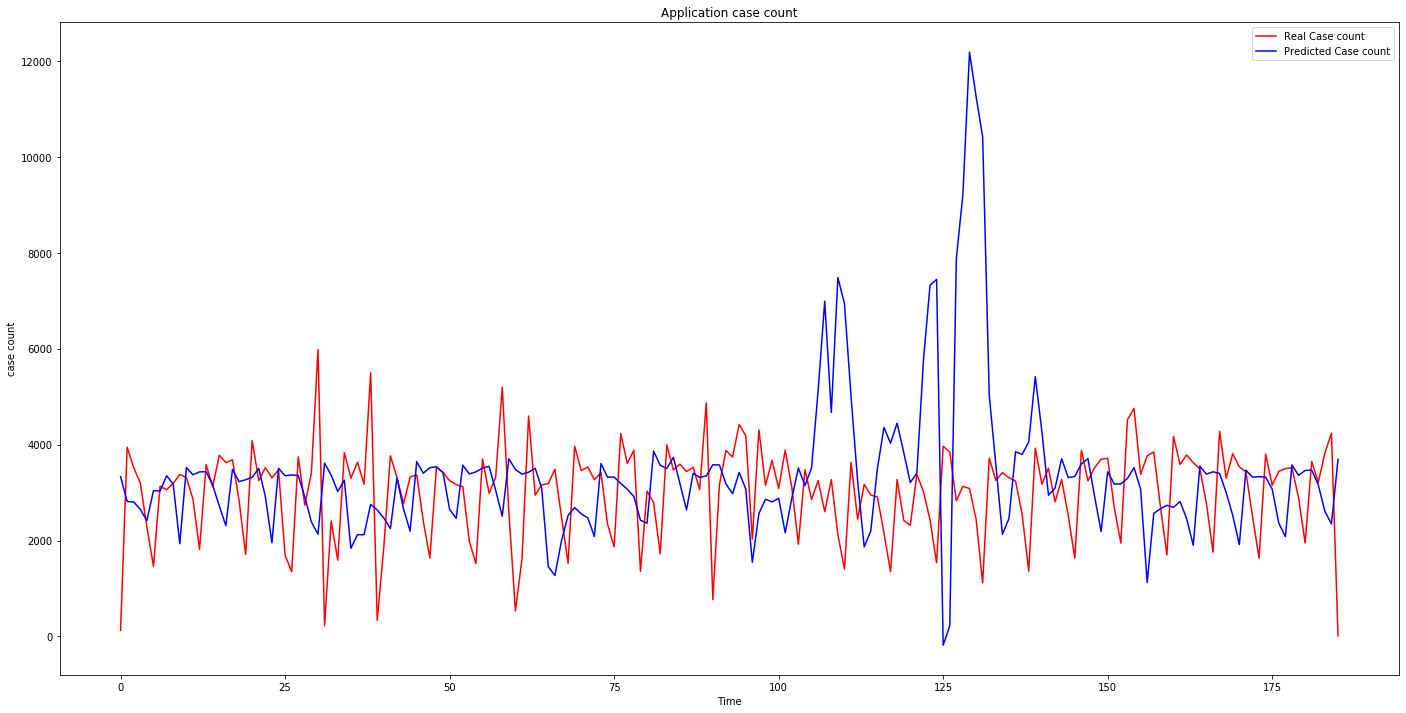

In [131]:
# Visualising the results
plt.figure(figsize=(24,12))
plt.plot(train_s1['2019'].values, color = 'red', label = 'Real Case count')
plt.plot(predicted_case_count, color = 'blue', label = 'Predicted Case count')
plt.title('Application case count')
plt.xlabel('Time')
plt.ylabel('case count')
plt.legend()
plt.show()

In [132]:
dataset_total_s1=train_s1_scaled.values
inputs = dataset_total[len(dataset_total) - len(dataset_test):]
inputs = inputs.reshape(-1,1)
#inputs = sc.transform(inputs)

X_test_s1 = []
for i in range(7, len(test_s1)+7):
    X_test_s1.append(inputs[i-7:i, 0])
X_test_s1 = np.array(X_test_s1)
X_test_s1 = np.reshape(X_test_s1, (X_test_s1.shape[0], X_test_s1.shape[1], 1))
pred_s1 = regressor.predict(X_test_s1)
pred_s1 = scaler.inverse_transform(pred_s1)
pred_s1

array([[3353.4084],
       [3173.015 ],
       [1933.8383],
       [3523.4844],
       [3372.336 ],
       [3431.939 ],
       [3437.4268],
       [3152.9814],
       [2721.341 ],
       [2310.1882],
       [3484.6755],
       [3230.0427],
       [3268.3325],
       [3319.9111],
       [3503.0576],
       [2916.9924],
       [1955.9849],
       [3508.1494],
       [3351.7957],
       [3367.764 ],
       [3356.9604],
       [2906.7002],
       [2388.3367],
       [2133.5576],
       [3616.1807],
       [3362.9602],
       [3021.9734],
       [3260.2578],
       [1840.4965],
       [2122.866 ],
       [2122.7312],
       [2755.0525],
       [2637.9065],
       [2469.3237],
       [2251.358 ],
       [3303.5532],
       [2655.8384],
       [2197.4402],
       [3645.626 ],
       [3404.2288],
       [3520.4727],
       [3538.5127],
       [3415.8867],
       [2650.0188],
       [2464.2173],
       [3572.4587],
       [3389.938 ],
       [3433.584 ],
       [3512.0605],
       [3546.428 ],


In [143]:
# Creating a data structure with 60 timesteps and 1 output
X_train_s2 = []
y_train_s2 = []
for i in range(7, len(train_s2_scaled)):
    X_train_s2.append(train_s2_scaled.values[i-7:i, 0])
    y_train_s2.append(train_s2_scaled.values[i,0])
X_train_s2, y_train_s2 = np.array(X_train_s2), np.array(y_train_s2)

In [144]:
# Reshaping
X_train_s2 = np.reshape(X_train_s2, (X_train_s2.shape[0], X_train_s2.shape[1], 1))

In [145]:
# Initialising the RNN
regressor2 = Sequential()

In [146]:
# Adding the first LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_s2.shape[1], 1)))
regressor2.add(Dropout(0.2))

In [147]:
# Adding a second LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

In [148]:
# Adding a third LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

In [149]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))

In [150]:
# Adding the output layer
regressor2.add(Dense(units = 1))

In [161]:
# Compiling the RNN
regressor2.compile(optimizer = 'adamax', loss = 'mean_squared_error', 
                   metrics=['mean_squared_error'])

In [162]:
# Fitting the RNN to the Training set
regressor2.fit(X_train_s2, y_train_s2, epochs = 100, batch_size = 32)

Epoch 1/100
837/837 [==============================] - 3s 3ms/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 2/100
837/837 [==============================] - 1s 892us/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 3/100
837/837 [==============================] - 1s 889us/step - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 4/100
837/837 [==============================] - 1s 885us/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 5/100
837/837 [==============================] - 1s 891us/step - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 6/100
837/837 [==============================] - 1s 893us/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 7/100
837/837 [==============================] - 1s 886us/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 8/100
837/837 [==============================] - 1s 891us/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 9/100
837/837 [==============================] - 1s 887us/step - loss: 0.0090 - mean_squared

837/837 [==============================] - 1s 878us/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 74/100
837/837 [==============================] - 1s 844us/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 75/100
837/837 [==============================] - 1s 833us/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 76/100
837/837 [==============================] - 1s 831us/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 77/100
837/837 [==============================] - 1s 839us/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 78/100
837/837 [==============================] - 1s 836us/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 79/100
837/837 [==============================] - 1s 818us/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 80/100
837/837 [==============================] - 1s 1ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 81/100
837/837 [==============================] - 1s 976us/step - loss: 0.0078 - mean_squared_err

In [163]:
# Making the predictions and visualising the results

# Getting the case count for 2019
dataset_test = train_s2_scaled['2019'].values

dataset_total = train_s2_scaled['2017':'2018'].values
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 7:]
inputs = inputs.reshape(-1,1)
#inputs = scaler.transform(inputs)
X_test = []
for i in range(7, len(dataset_test)+7):
    X_test.append(inputs[i-7:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_case_count = regressor2.predict(X_test)
predicted_case_count = scaler2.inverse_transform(predicted_case_count)

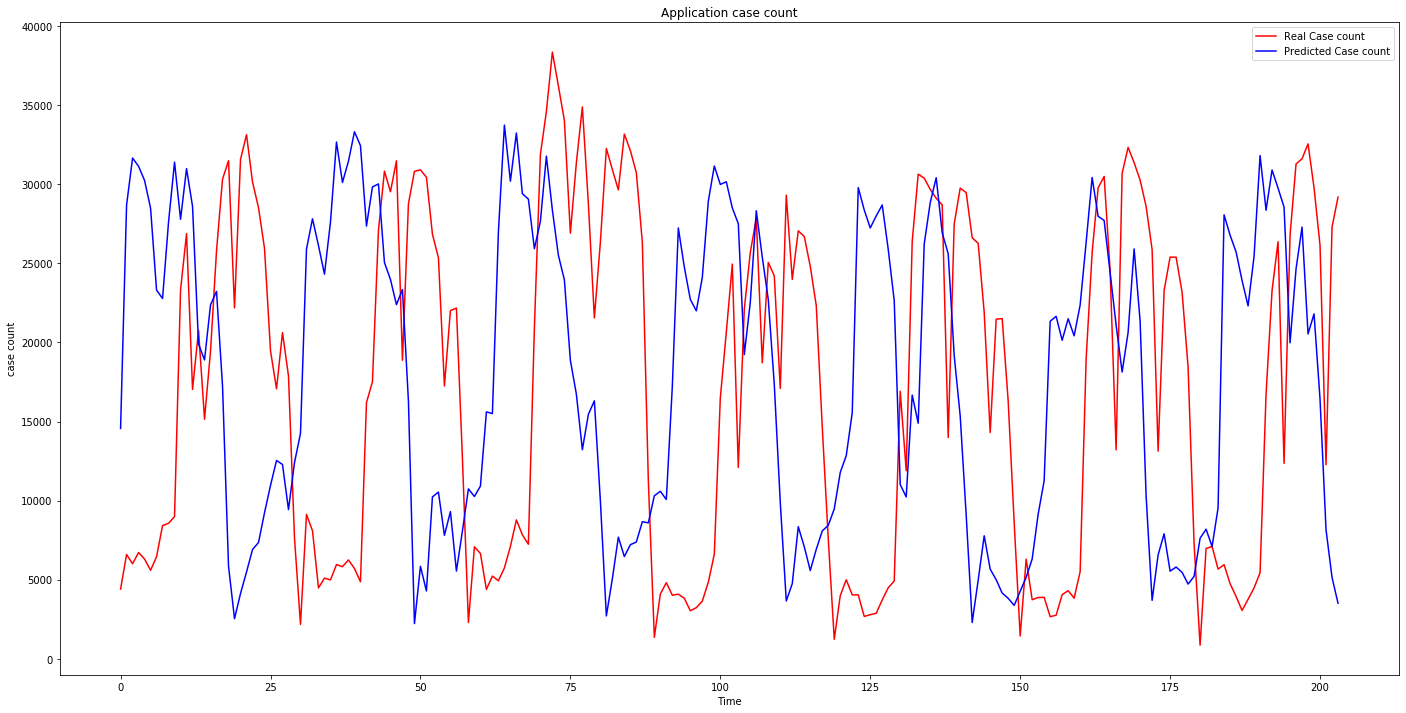

In [164]:
# Visualising the results
plt.figure(figsize=(24,12))
plt.plot(train_s2['2019'].values, color = 'red', label = 'Real Case count')
plt.plot(predicted_case_count, color = 'blue', label = 'Predicted Case count')
plt.title('Application case count')
plt.xlabel('Time')
plt.ylabel('case count')
plt.legend()
plt.show()

In [165]:
dataset_total_s2=train_s2_scaled.values
inputs = dataset_total[len(dataset_total) - len(dataset_test):]
inputs = inputs.reshape(-1,1)
#inputs = sc.transform(inputs)

X_test_s2 = []
for i in range(7, len(test_s2)+7):
    X_test_s2.append(inputs[i-7:i, 0])
X_test_s2 = np.array(X_test_s2)
X_test_s2 = np.reshape(X_test_s2, (X_test_s2.shape[0], X_test_s2.shape[1], 1))
pred_s2 = regressor2.predict(X_test_s2)
pred_s2 = scaler2.inverse_transform(pred_s2)
pred_s2

array([[22772.234 ],
       [27614.73  ],
       [31388.701 ],
       [27780.373 ],
       [30983.438 ],
       [28594.008 ],
       [19891.82  ],
       [18892.418 ],
       [22375.346 ],
       [23223.062 ],
       [17236.445 ],
       [ 5857.9644],
       [ 2535.651 ],
       [ 4130.931 ],
       [ 5486.688 ],
       [ 6909.5396],
       [ 7352.637 ],
       [ 9231.625 ],
       [10958.132 ],
       [12536.145 ],
       [12283.748 ],
       [ 9430.9   ],
       [12400.184 ],
       [14250.084 ],
       [25894.857 ],
       [27812.855 ],
       [26120.508 ],
       [24311.793 ],
       [27609.006 ],
       [32663.062 ],
       [30111.174 ],
       [31454.482 ],
       [33313.184 ],
       [32436.146 ],
       [27350.871 ],
       [29826.457 ],
       [30013.836 ],
       [25044.139 ],
       [23978.248 ],
       [22385.    ],
       [23341.277 ],
       [16271.379 ],
       [ 2226.9114],
       [ 5845.971 ],
       [ 4288.336 ],
       [10234.154 ],
       [10539.653 ],
       [ 7806

In [166]:
pred_ts = np.concatenate((pred_s1,pred_s2),axis=0)

In [167]:
pred_ts.shape

(180, 1)

In [168]:
sub['case_count'] = pred_ts
sub.to_csv('pred_TS_RNN.csv', index=False)

In [169]:
pred_ts

array([[ 3353.4084],
       [ 3173.015 ],
       [ 1933.8383],
       [ 3523.4844],
       [ 3372.336 ],
       [ 3431.939 ],
       [ 3437.4268],
       [ 3152.9814],
       [ 2721.341 ],
       [ 2310.1882],
       [ 3484.6755],
       [ 3230.0427],
       [ 3268.3325],
       [ 3319.9111],
       [ 3503.0576],
       [ 2916.9924],
       [ 1955.9849],
       [ 3508.1494],
       [ 3351.7957],
       [ 3367.764 ],
       [ 3356.9604],
       [ 2906.7002],
       [ 2388.3367],
       [ 2133.5576],
       [ 3616.1807],
       [ 3362.9602],
       [ 3021.9734],
       [ 3260.2578],
       [ 1840.4965],
       [ 2122.866 ],
       [ 2122.7312],
       [ 2755.0525],
       [ 2637.9065],
       [ 2469.3237],
       [ 2251.358 ],
       [ 3303.5532],
       [ 2655.8384],
       [ 2197.4402],
       [ 3645.626 ],
       [ 3404.2288],
       [ 3520.4727],
       [ 3538.5127],
       [ 3415.8867],
       [ 2650.0188],
       [ 2464.2173],
       [ 3572.4587],
       [ 3389.938 ],
       [ 3433